### Лабораторна робота №7
Студента групи МІТ-31 (підгрупа 1)
Черевача Юрія Анатолійовича

Мета:
Розробка та порівняння моделей глибокого навчання для мультикласової класифікації трьох класів зображень їжі, а також використання transfer learning для покращення результатів.

Дані:
Набір даних: 10_food_classes_all_data.zip.

Завдання:
Вибір Класів:

Виберіть три класи з набору даних для класифікації на основі методики вибору з практичної роботи.
Попередня Обробка:

Завантажте та розпакуйте набір даних.
Поділіть дані на тренувальний, валідаційний та тестовий набори.
Виконайте необхідну попередню обробку даних.
Розробка та Тренування Моделей:

Створіть три різні моделі глибокого навчання для класифікації обраних класів. Наприклад, ви можете змінювати архітектуру, кількість шарів, активаційні функції тощо.
Тренуйте кожну модель на тренувальному наборі даних та валідуйте їх на валідаційному наборі.
Оцінка Моделей:

Оцініть кожну модель на тестовому наборі даних.
Запишіть та порівняйте результати точності та часу тренування для кожної моделі.
Додаткове Завдання (на високу оцінку):

Використайте transfer learning з використанням EfficientNet з TensorFlow Hub для класифікації тих самих трьох класів.
Порівняйте результати цієї моделі з попередніми трьома за точністю та часом тренування.

In [70]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, models
import tensorflow_hub as hub
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
train_data_dir = "./10_food_classes_all_data/10_food_classes_all_data/train/"
test_data_dir = "./10_food_classes_all_data/10_food_classes_all_data/test/"


# Зазначте параметри попередньої обробки, такі як масштабування, розмір зображення, тощо.
datagen = ImageDataGenerator(
    rescale=1./255,  # масштабування значень пікселів від 0-255 до 0-1
)

# Зчитування та попередня обробка тестових даних
test_generator = datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(224, 224),  # розмір зображення
    batch_size=32,
    classes=['pizza', 'ice_cream', 'sushi'] ,
    class_mode='categorical'    # якщо у вас мультикласова класифікація
)

# Зчитування та попередня обробка тренувальних даних
train_generator = datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(224, 224),  # розмір зображення
    batch_size=32,
    classes=['pizza', 'ice_cream', 'sushi'],
    class_mode='categorical'  # якщо у вас мультикласова класифікація
)



Found 750 images belonging to 3 classes.
Found 2250 images belonging to 3 classes.


In [28]:
# Задаємо архітектуру першої моделі
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 класи для класифікації
])

# Компіляція та тренування першої моделі
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(train_generator, epochs=9, validation_data=test_generator)

# Задаємо архітектуру другої моделі (змінюємо архітектуру за бажанням)
model2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 класи для класифікації
])

# Компіляція та тренування другої моделі
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_generator, epochs=9, validation_data=test_generator)

# Задаємо архітектуру третьої моделі (змінюємо архітектуру за бажанням)
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 класи для класифікації
])

# Компіляція та тренування третьої моделі
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(train_generator, epochs=9, validation_data=test_generator)

Epoch 1/9
71/71 [==============================] - 79s 1s/step - loss: 1.0420 - accuracy: 0.4898 - val_loss: 0.8910 - val_accuracy: 0.5747
Epoch 2/9
71/71 [==============================] - 75s 1s/step - loss: 0.8667 - accuracy: 0.6062 - val_loss: 0.8311 - val_accuracy: 0.6200
Epoch 3/9
71/71 [==============================] - 43s 603ms/step - loss: 0.7551 - accuracy: 0.6653 - val_loss: 0.8607 - val_accuracy: 0.5920
Epoch 4/9
71/71 [==============================] - 40s 560ms/step - loss: 0.5521 - accuracy: 0.7711 - val_loss: 0.9603 - val_accuracy: 0.6240
Epoch 5/9
71/71 [==============================] - 39s 555ms/step - loss: 0.3373 - accuracy: 0.8689 - val_loss: 1.2225 - val_accuracy: 0.6267
Epoch 6/9
71/71 [==============================] - 39s 552ms/step - loss: 0.1692 - accuracy: 0.9369 - val_loss: 1.4375 - val_accuracy: 0.6307
Epoch 7/9
71/71 [==============================] - 39s 550ms/step - loss: 0.1126 - accuracy: 0.9644 - val_loss: 1.7855 - val_accuracy: 0.6027
Epoch 8/9
71

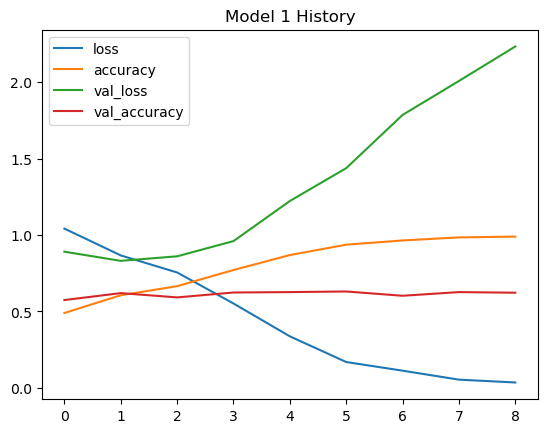

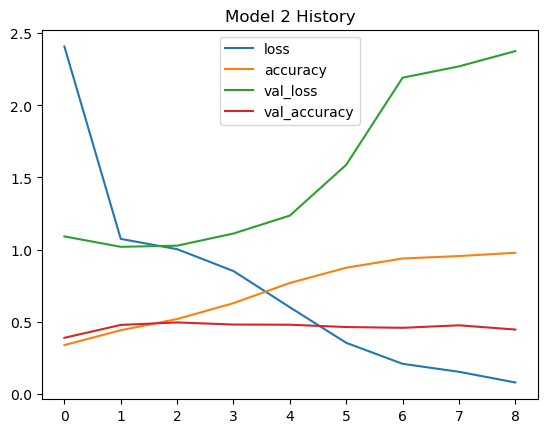

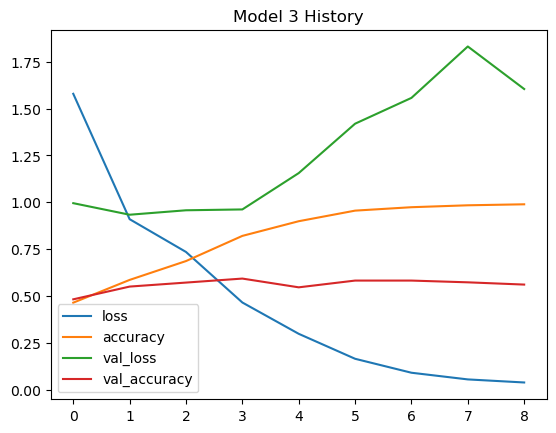

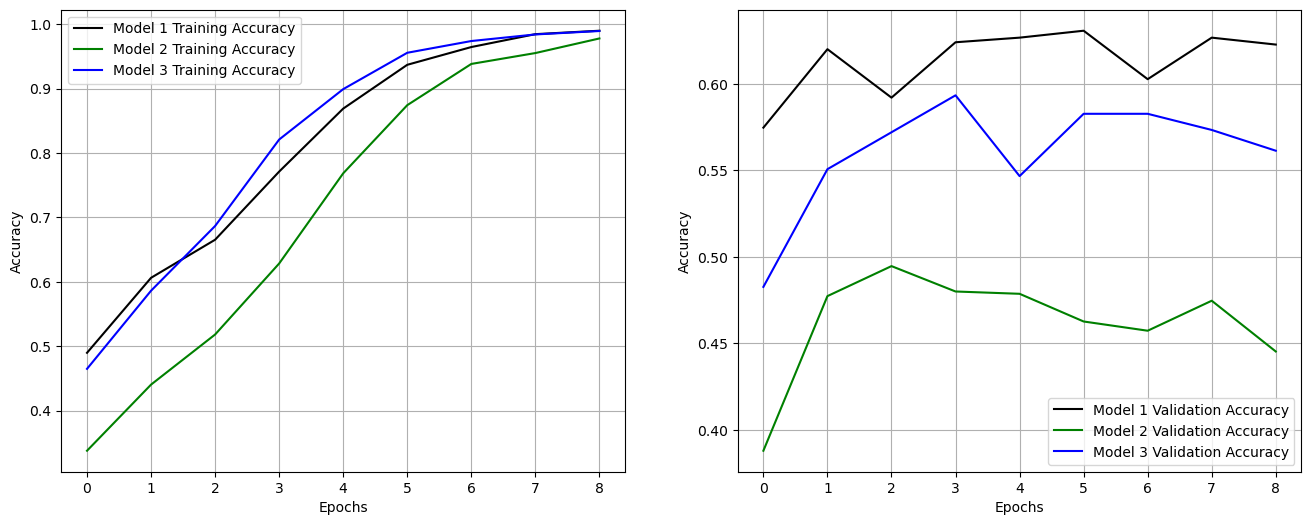

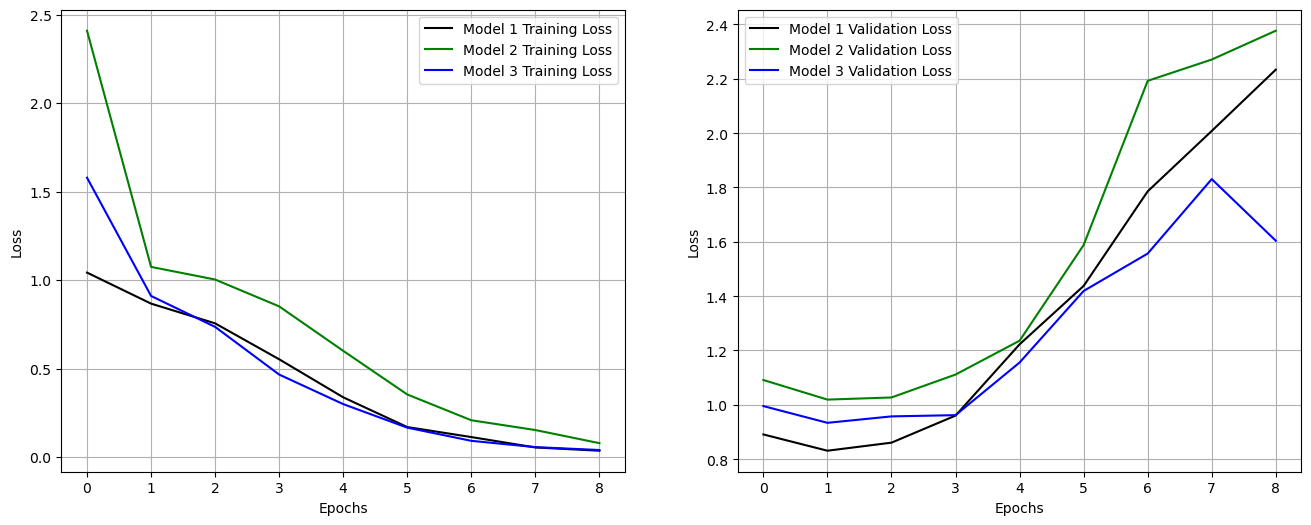

In [74]:
pd.DataFrame(history1.history).plot(title="Model 1 History")
pd.DataFrame(history2.history).plot(title="Model 2 History")
pd.DataFrame(history3.history).plot(title="Model 3 History")

plt.figure(figsize=(16, 6))

# Графіки точності
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Model 1 Training Accuracy', color='black')
plt.plot(history2.history['accuracy'], label='Model 2 Training Accuracy', color='g')
plt.plot(history3.history['accuracy'], label='Model 3 Training Accuracy', color='b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history1.history['val_accuracy'], label='Model 1 Validation Accuracy', color='black')
plt.plot(history2.history['val_accuracy'], label='Model 2 Validation Accuracy', color='g')
plt.plot(history3.history['val_accuracy'], label='Model 3 Validation Accuracy', color='b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.figure(figsize=(16, 6))

# Графіки втрат
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Model 1 Training Loss', color='black')
plt.plot(history2.history['loss'], label='Model 2 Training Loss', color='g')
plt.plot(history3.history['loss'], label='Model 3 Training Loss', color='b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history1.history['val_loss'], label='Model 1 Validation Loss', color='black')
plt.plot(history2.history['val_loss'], label='Model 2 Validation Loss', color='g')
plt.plot(history3.history['val_loss'], label='Model 3 Validation Loss', color='b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


plt.show()

#### Короткі підсумки

- Друга модель себе показала найгірше
- За результатами тестування найкраще себе показала перша модель 
- Найменше часу для тренування потребувала третя модель, найбільше - друга

In [64]:

time_of_train_1 = [79, 75, 43, 40, 39, 39, 39, 39, 39]
time_of_train_2 = [137, 110, 978, 166, 198, 164, 120, 126, 111]
time_of_train_3 = [50, 47, 38, 35, 35, 35, 36, 35, 36]

val_accuracy_list_1 = history1.history['val_accuracy']
val_accuracy_list_2 = history2.history['val_accuracy']
val_accuracy_list_3 = history3.history['val_accuracy']

val_loss_list_1 = history1.history['val_loss']
val_loss_list_2 = history2.history['val_loss']
val_loss_list_3 = history3.history['val_loss']

data = {
    'Час тренування моделі 1': time_of_train_1,
    'Тестова точність моделі 1': val_accuracy_list_1,
    'Тестові втрати моделі 1': val_loss_list_1,

    'Час тренування моделі 2': time_of_train_2,
    'Тестова точність моделі 2': val_accuracy_list_2,
    'Тестові втрати моделі 2': val_loss_list_2,

    'Час тренування моделі 3': time_of_train_3,
    'Тестова точність моделі 3': val_accuracy_list_3,
    'Тестові втрати моделі 3': val_loss_list_3,
}

# Створіть DataFrame
table = pd.DataFrame(data)

table.head()

,Час тренування моделі 1,Тестова точність моделі 1,Тестові втрати моделі 1,Час тренування моделі 2,Тестова точність моделі 2,Тестові втрати моделі 2,Час тренування моделі 3,Тестова точність моделі 3,Тестові втрати моделі 3
0,79,0.574667,0.890964,137,0.388000,1.091323,50,0.482667,0.995313
1,75,0.620000,0.831072,110,0.477333,1.019201,47,0.550667,0.933730
2,43,0.592000,0.860746,978,0.494667,1.027065,38,0.572000,0.957433
3,40,0.624000,0.960283,166,0.480000,1.111396,35,0.593333,0.961955
4,39,0.626667,1.222549,198,0.478667,1.235930,35,0.546667,1.155661


In [72]:

# Завантаження EfficientNet моделі з TensorFlow Hub
efficientnet_url = "https://tfhub.dev/google/efficientnet/b0/feature-vector/1"
efficientnet_model = hub.KerasLayer(efficientnet_url, input_shape=(224, 224, 3))

# Замороження ваг моделі
efficientnet_model.trainable = False

# Створення моделі
model_efficientnet = models.Sequential([
    efficientnet_model,
    layers.Dense(3, activation='softmax')  # 3 класи для класифікації
])

# Компіляція моделі
model_efficientnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#тренування
history_efficientnet = model_efficientnet.fit(train_generator, epochs=9, validation_data=test_generator)

Epoch 1/9
71/71 [==============================] - 57s 730ms/step - loss: 0.3619 - accuracy: 0.8911 - val_loss: 0.1178 - val_accuracy: 0.9813
Epoch 2/9
71/71 [==============================] - 38s 536ms/step - loss: 0.1602 - accuracy: 0.9582 - val_loss: 0.0827 - val_accuracy: 0.9800
Epoch 3/9
71/71 [==============================] - 44s 620ms/step - loss: 0.1236 - accuracy: 0.9649 - val_loss: 0.0741 - val_accuracy: 0.9800
Epoch 4/9
71/71 [==============================] - 42s 587ms/step - loss: 0.1046 - accuracy: 0.9698 - val_loss: 0.0660 - val_accuracy: 0.9800
Epoch 5/9
71/71 [==============================] - 42s 590ms/step - loss: 0.0891 - accuracy: 0.9733 - val_loss: 0.0616 - val_accuracy: 0.9827
Epoch 6/9
71/71 [==============================] - 55s 779ms/step - loss: 0.0788 - accuracy: 0.9756 - val_loss: 0.0593 - val_accuracy: 0.9813
Epoch 7/9
71/71 [==============================] - 50s 687ms/step - loss: 0.0696 - accuracy: 0.9800 - val_loss: 0.0538 - val_accuracy: 0.9827
Epoch 

<Axes: title={'center': 'Model History'}>

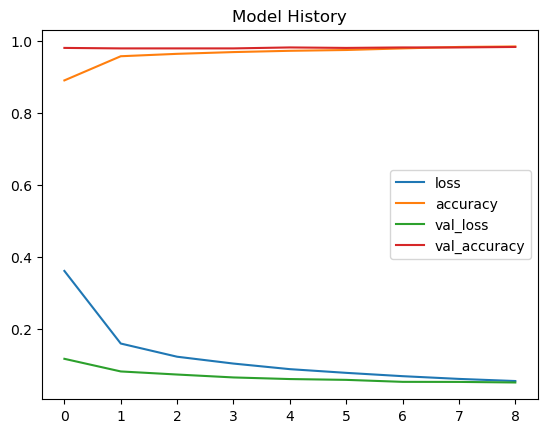

In [73]:
pd.DataFrame(history_efficientnet.history).plot(title="Model History")

In [75]:
time_of_train_efficientnet = [57, 38, 44, 42, 42, 55, 50, 46, 50]

val_accuracy_list_efficientnet = history_efficientnet.history['val_accuracy']

val_loss_list_efficientnet = history_efficientnet.history['val_loss']

data_efficientnet = {
    'Час тренування EfficientNet': time_of_train_efficientnet,
    'Тестова точність EfficientNet': val_accuracy_list_efficientnet,
    'Тестові втрати EfficientNet': val_loss_list_efficientnet,
}

# Створіть DataFrame
table_efficientnet = pd.DataFrame(data_efficientnet)

table_efficientnet.head()

,Час тренування EfficientNet,Тестова точність EfficientNet,Тестові втрати EfficientNet
0,57,0.981333,0.117792
1,38,0.980000,0.082704
2,44,0.980000,0.074136
3,42,0.980000,0.066039
4,42,0.982667,0.061567


EfficientNet модель з TensorFlow Hub продемонструвала чудові результати і прекрасно справилася із поставленою задачею. Годі й порівнювати з моделями, які я використовував до цього, при тому що час роботи також дуже добрий.